Decision Tree Classifier

Question 1

In [ ]:
import pandas as pd
import numpy as np
!pip install pydotplus
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dict1={
    "Alt":["Yes","Yes","No","Yes","Yes","No","No","No","No","Yes","No","Yes"],
    "Bar":["No","No","Yes","No","No","Yes","Yes","No","Yes","Yes","No","Yes"],
    "Fri":["No","No","No","Yes","Yes","No","No","No","Yes","Yes","No","Yes"],
    "Hun":["Yes","Yes","No","Yes","No","Yes","No","Yes","No","Yes","No","Yes"],
    "Pat":["Some","Full","Some","Full","Full","Some","None","Some","Full","Full","None","Full"],
    "Price":["$$$","$","$","$","$$$","$$","$","$$","$","$$$","$","$"],
    "Rain":["No","No","No","Yes","No","Yes","Yes","Yes","Yes","No","No","No"],
    "Res":["Yes","No","No","No","Yes","Yes","No","Yes","No","Yes","No","No"],
    "Type":["French","Thai","Burger","Thai","French","Italian","Burger","Thai","Burger","Italian","Thai","Burger"],
    "Est":["0-10","30-60","0-10","10-30",">60","0-10","0-10","0-10",">60","10-30","0-10","30-60"],
    "GoalWait":["Yes","No","Yes","Yes","No","Yes","No","Yes","No","No","No","Yes"]
}

In [ ]:
df=pd.DataFrame(dict1)
df=pd.read_csv('rest.csv')
print(df)

    Alt  Bar  Fri  Hun   Pat Price Rain  Res     Type    Est Wait
0   Yes   No   No  Yes  Some   $$$   No  Yes   French   0-10  Yes
1   Yes   No   No  Yes  Full     $   No   No     Thai  30-60   No
2    No  Yes   No   No  Some     $   No   No   Burger   0-10  Yes
3   Yes   No  Yes  Yes  Full     $   No   No     Thai  10-30  Yes
4   Yes   No  Yes   No  Full   $$$   No  Yes   French    >60   No
5    No  Yes   No  Yes  Some    $$  Yes  Yes  Italian   0-10  Yes
6    No  Yes   No   No  None     $  Yes   No   Burger   0-10   No
7    No   No   No  Yes  Some    $$  Yes  Yes     Thai   0-10  Yes
8    No  Yes  Yes   No  Full     $  Yes   No   Burger    >60   No
9   Yes  Yes  Yes  Yes  Full   $$$   No  Yes  Italian  10-30   No
10   No   No   No   No  None     $   No   No     Thai   0-10   No
11  Yes  Yes  Yes  Yes  Full     $   No   No   Burger  30-60  Yes


In [ ]:
objList = df.select_dtypes(include = "object").columns
print(objList)
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
print(df)

print (df.info())

Index(['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type',
       'Est', 'Wait'],
      dtype='object')
    Alt  Bar  Fri  Hun  Pat  Price  Rain  Res  Type  Est  Wait
0     1    0    0    1    2      2     0    1     1    0     1
1     1    0    0    1    0      0     0    0     3    2     0
2     0    1    0    0    2      0     0    0     0    0     1
3     1    0    1    1    0      0     0    0     3    1     1
4     1    0    1    0    0      2     0    1     1    3     0
5     0    1    0    1    2      1     1    1     2    0     1
6     0    1    0    0    1      0     1    0     0    0     0
7     0    0    0    1    2      1     1    1     3    0     1
8     0    1    1    0    0      0     1    0     0    3     0
9     1    1    1    1    0      2     0    1     2    1     0
10    0    0    0    0    1      0     0    0     3    0     0
11    1    1    1    1    0      0     0    0     0    2     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 1]
 [1 1]]


0.5

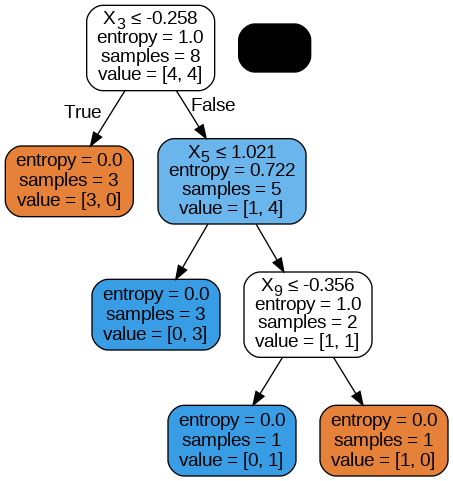

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Question 2: CarSeats

In [ ]:
dataset = pd.read_csv('Carseats.csv')

In [ ]:
objList = dataset.select_dtypes(include = "object").columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB
None


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21 10]
 [ 8 61]]


0.82

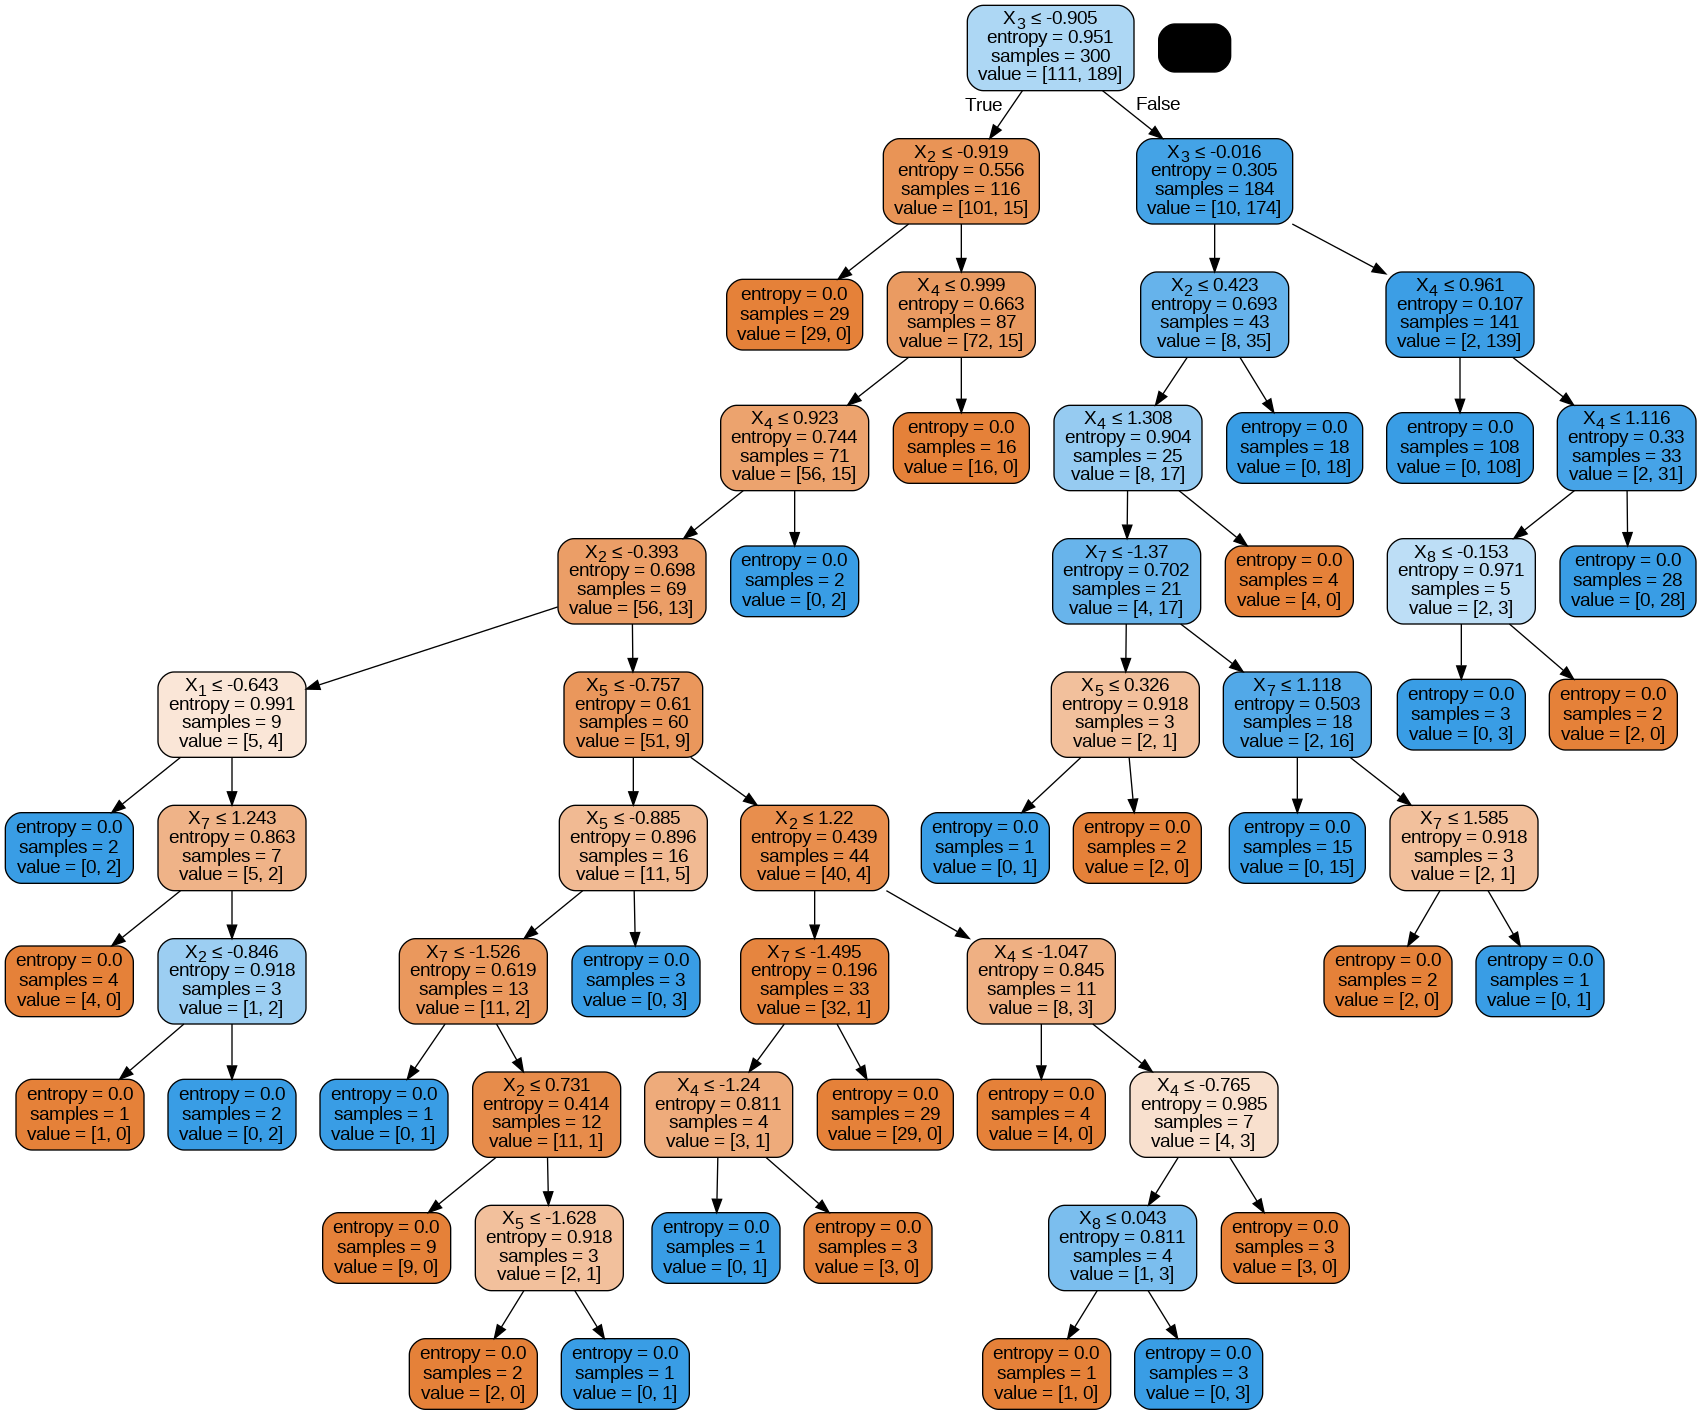

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())